<a href="https://colab.research.google.com/github/azizbekb/animalsClassification/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import fastai
from fastai.vision.all import *
from ipywidgets import widgets

In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

In [ ]:
!cd OIDv4_ToolKit && pip install -r requirements.txt

In [ ]:
!cd OIDv4_ToolKit && python main.py -h

In [ ]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Bird Bear Fish --type_csv train --limit 200

In [6]:
#path
path=Path('train')
path.ls()

(#3) [Path('train/Fish'),Path('train/Bird'),Path('train/Bear')]

In [7]:
fls=get_image_files(path)
failed=verify_images(path)
failed

'PosixPath' object is not iterable


(#0) []

In [8]:
#Datablock
animals=DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

In [9]:
#Dataloader
dls=animals.dataloaders(path)

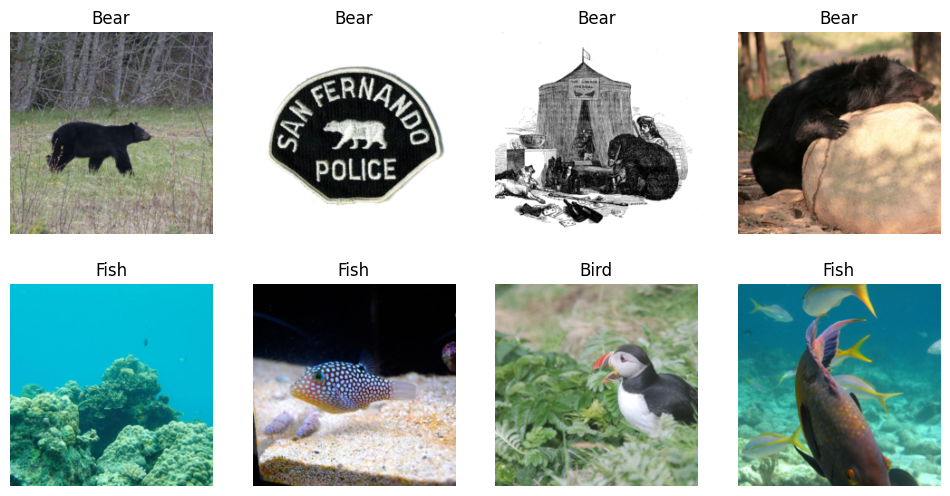

In [10]:
#Dataset validation
dls.train.show_batch(max_n=8, nrows=2)

In [11]:
#Train
learn=cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,accuracy,time
0,1.236490,0.436041,0.891667,00:19


epoch,train_loss,valid_loss,accuracy,time
0,0.416338,0.290281,0.900000,00:19
1,0.272793,0.280904,0.916667,00:13
2,0.205954,0.268327,0.933333,00:18
3,0.161251,0.275752,0.933333,00:13


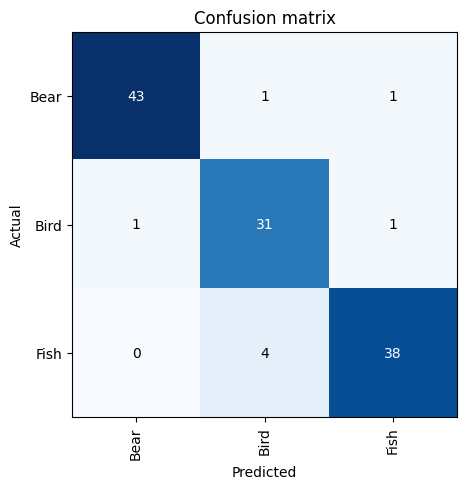

In [12]:
#Check
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [23]:
upload=widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Predict:Bird
Probability:100.0%


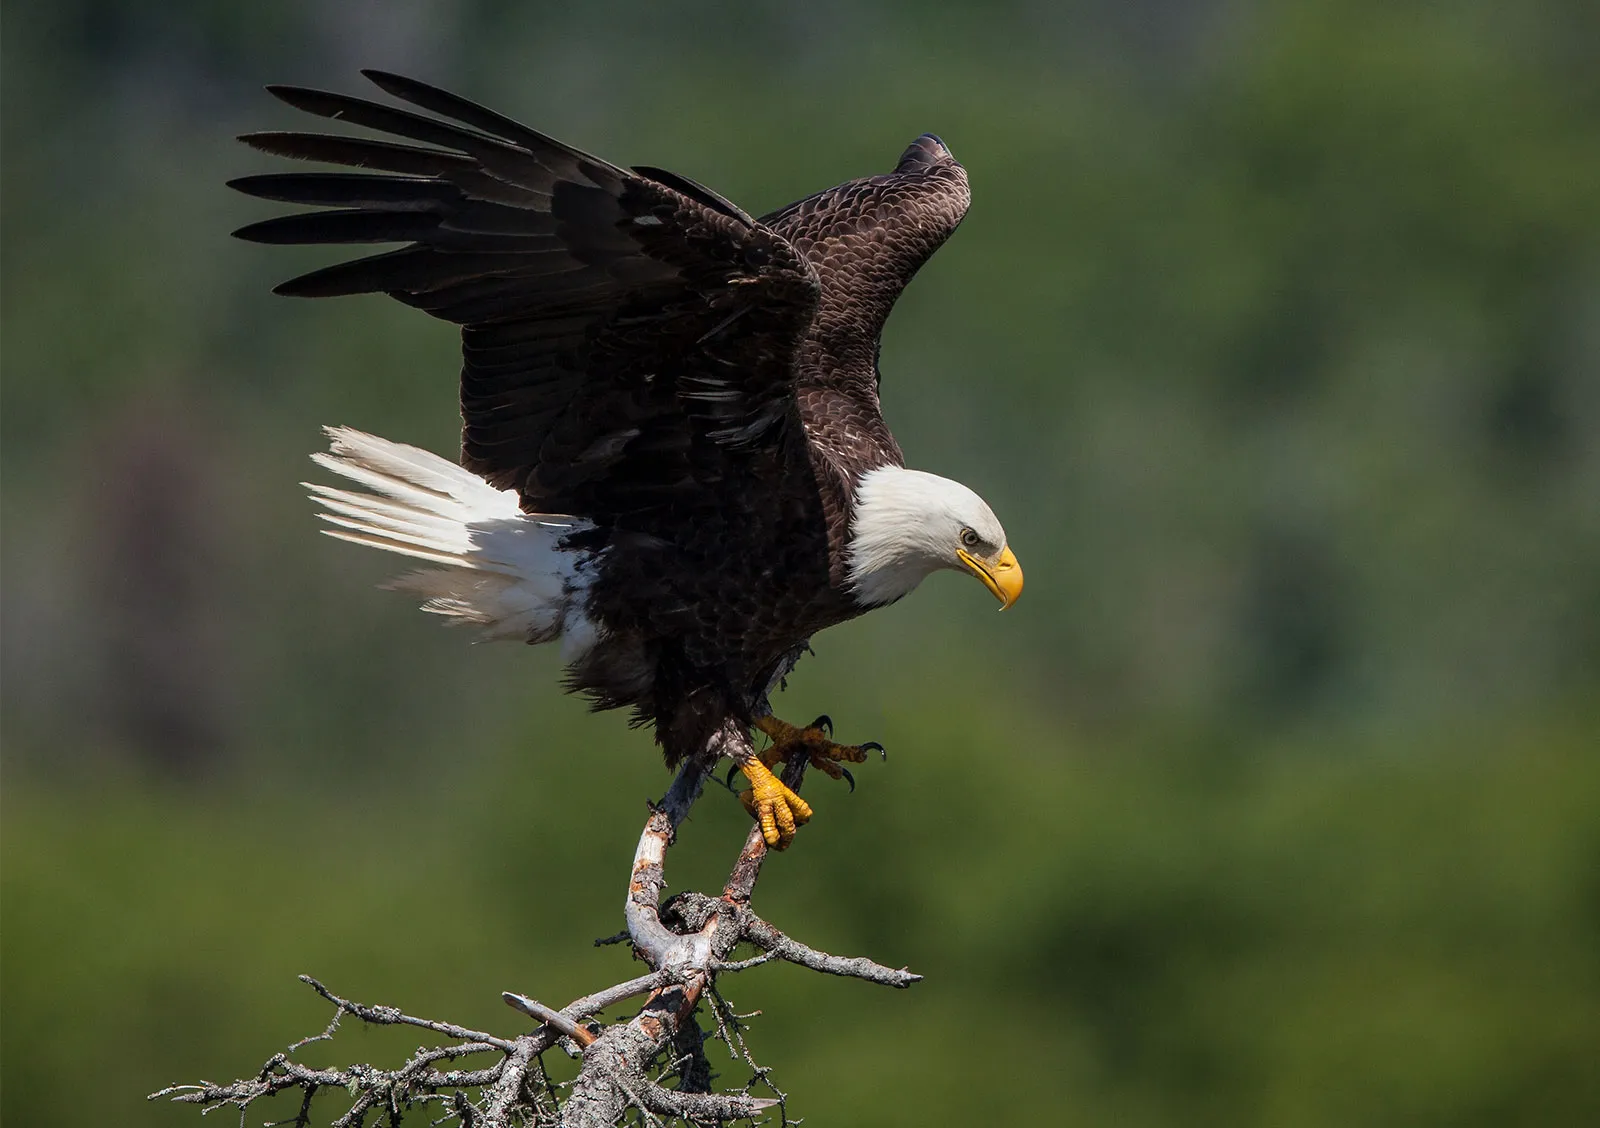

In [30]:
img=PILImage.create(upload.data[-1])
pred, pred_id, probs=learn.predict(img)
print(f"Predict:{pred}")
print(f"Probability:{probs[pred_id]*100:.1f}%")
img

In [31]:
learn.export('animal_model.pkl')

In [32]:
model=load_learner("/content/animal_model.pkl")

In [33]:
model.predict(img)

('Bird', tensor(1), tensor([1.1315e-06, 1.0000e+00, 1.2429e-06]))